In [39]:
%pip install requests beautifulsoup4 pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
url = 'https://doge.gov/savings'
response = requests.get(url)
if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print("Failed to retrieve the page.")
    exit()


Page fetched successfully!


In [42]:
headers = {
	'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url, headers=headers)
if response.status_code == 200:
	tables = pd.read_html(response.text)
	print(f"Found {len(tables)} tables on the page.")
else:
	print("Failed to retrieve the page.")

C:\Users\ponug\AppData\Local\Temp\ipykernel_4260\3590359574.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


Found 3 tables on the page.


In [43]:
contracts_df = tables[0]
print("Contracts table preview:")
# print(contracts_df['Agency'].unique())

print(contracts_df.head())
# print(pd.options.display.max_rows) 
# print(contracts_df.columns)
# ['Agency', 'Description', 'Uploaded On', 'Link', 'Value']   These are the columns we are interested in

Contracts table preview:
                                              Agency  \
0                          BUREAU OF LAND MANAGEMENT   
1     CORPORATION FOR NATIONAL AND COMMUNITY SERVICE   
2  COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLI...   
3               COMMODITY FUTURES TRADING COMMISSION   
4               COMMODITY FUTURES TRADING COMMISSION   

                                         Description Uploaded On  Link  \
0                                   EEO DEIA SUPPORT   2/13/2025   NaN   
1  CHANGE MANAGEMENT AND BUSINESS PROCESS REENGIN...   2/26/2025   NaN   
2  Legal Database that allows lawyers to conduct ...   2/20/2025   NaN   
3                Annual subscription to Politico Pro   2/13/2025   NaN   
4                                FT.COM SUBSCRIPTION   2/25/2025   NaN   

        Value  
0    $440,000  
1  $3,204,278  
2    $199,305  
3    $255,863  
4    $188,073  


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ponug\AppData\Local\Temp\ipykernel_4260\2227754723.py:2: SyntaxWarning: invalid escape sequence '\$'
  contracts_df['Value'] = contracts_df['Value'].replace('[\$,]', '', regex=True).astype(float)


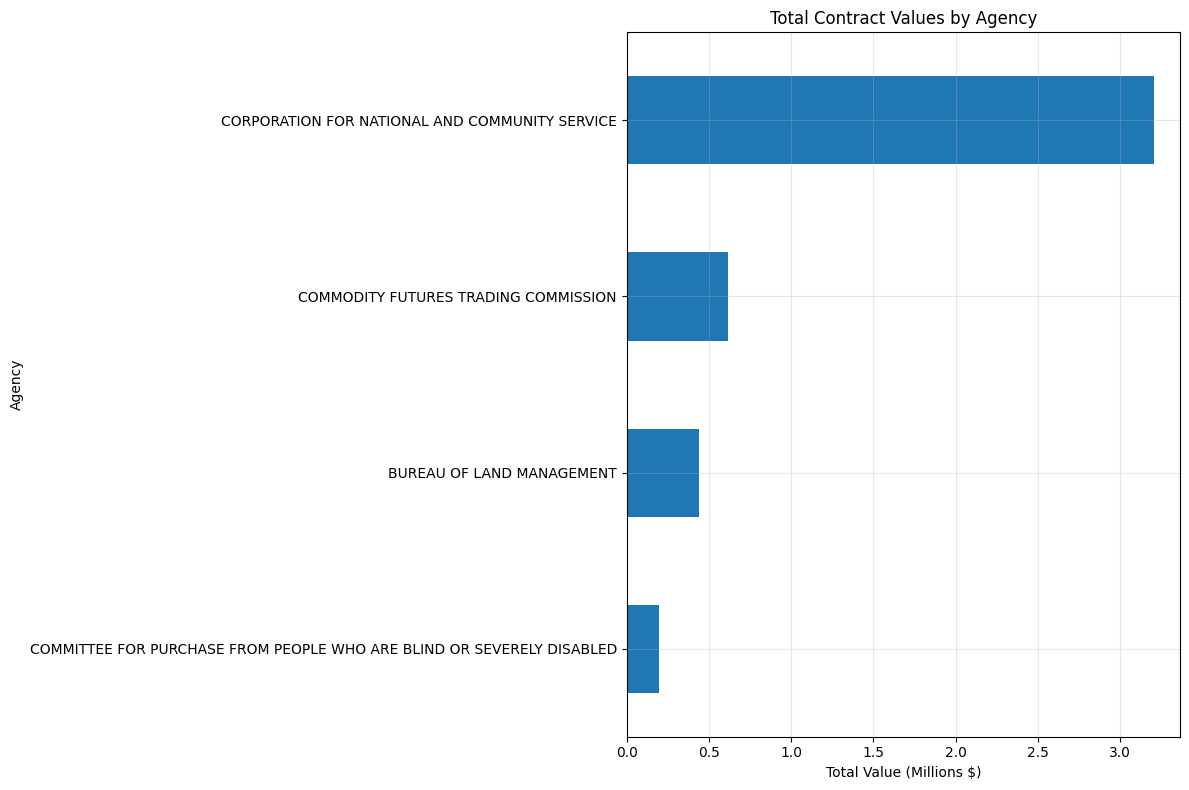

In [49]:

# Clean the 'Value' column and convert to numeric
contracts_df['Value'] = contracts_df['Value'].replace('[\$,]', '', regex=True).astype(float)

# Create a bar chart
plt.figure(figsize=(12, 8))
agency_values = contracts_df.groupby('Agency')['Value'].sum().sort_values(ascending=True)
agency_values = agency_values / 1_000_000  # Convert to millions
agency_values.plot(kind='barh')
plt.title('Total Contract Values by Agency')
plt.xlabel('Total Value (Millions $)')
plt.ylabel('Agency')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

Number of unique agencies: 4

Agencies and their counts:
Agency
COMMODITY FUTURES TRADING COMMISSION                                     3
BUREAU OF LAND MANAGEMENT                                                1
CORPORATION FOR NATIONAL AND COMMUNITY SERVICE                           1
COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLIND OR SEVERELY DISABLED    1
Name: count, dtype: int64

Grouped data values:
Agency
CORPORATION FOR NATIONAL AND COMMUNITY SERVICE                           3204278.0
COMMODITY FUTURES TRADING COMMISSION                                      613195.0
BUREAU OF LAND MANAGEMENT                                                 440000.0
COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLIND OR SEVERELY DISABLED     199305.0
Name: Value, dtype: float64
